The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. We will use it to do some exploratory data analysis (EDA) to predict students final grade. 

What we want to know:
- Correlation between features
- Weekly consumption of alcohol by the students
- Final exam scores based on student's alcohol consumption



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

student-alcohol-consumption

/kaggle/input/student-alcohol-consumption/student-merge.R
/kaggle/input/student-alcohol-consumption/student-mat.csv
/kaggle/input/student-alcohol-consumption/student-por.csv


In [2]:
data = pd.read_csv('../input/student-alcohol-consumption/student-mat.csv')
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [3]:
data.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Attributes that we're interested in:

- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- G3 - final grade (numeric: from 0 to 20, output target)

### Correlation between features

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]), <a list of 16 Text yticklabel objects>)

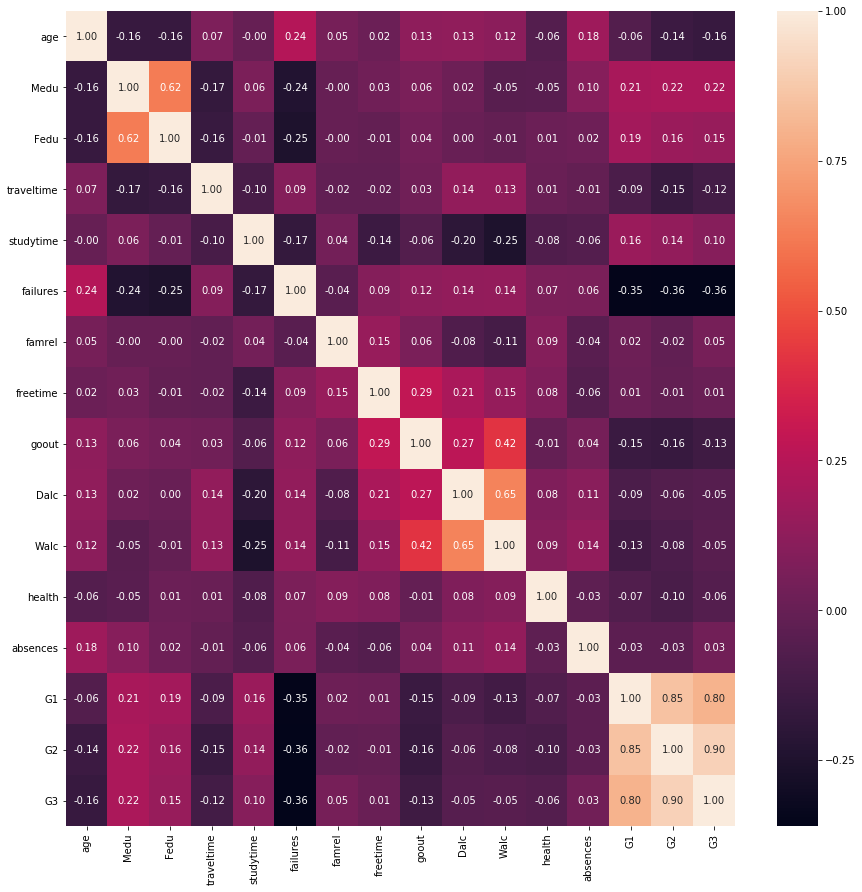

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot = True, fmt= ".2f", cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

It seems that only exam scores that are highly correlated with each other. Now let's combine weekdays alcohol consumption with weekend alcohol consumption. 

In [6]:
data['Dalc'] = data['Dalc'] + data['Walc']

Text(0.5, 0, 'Weekly alcohol consumption')

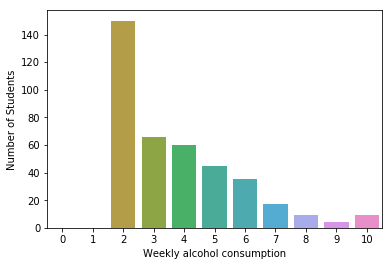

In [7]:
# Let's check if students drink alcohol
list = []
for i in range(11):
    list.append(len(data[data.Dalc == i]))
    
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

Text(0.5, 0, 'Students Grade Based on Weekly Alcohol Consumption')

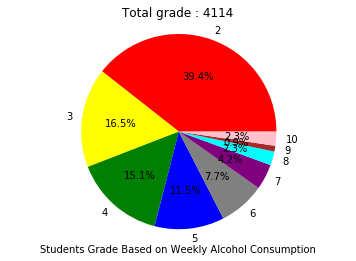

In [8]:
# Visualize final exam scores based on student's alcohol consumption
labels = ['2', '3','4', '5', '6', '7', '8', '9', '10']
colors = ['red', 'yellow', 'green', 'blue', 'grey', 'purple', 'cyan', 'brown', 'pink']
explode = [0,0,0,0,0,0,0,0,0]
sizes = []

for i in range(2,11):
    sizes.append(sum(data[data.Dalc == i].G3))
    
total_grade= sum(sizes)
average = total_grade/float(len(data))

plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Total grade : '+str(total_grade))
plt.xlabel('Students Grade Based on Weekly Alcohol Consumption')

It seems that those who consumed alcohol twice a week perform better. Let's take a look with swarm plot to understand whether alcohol really does impact the grades. 

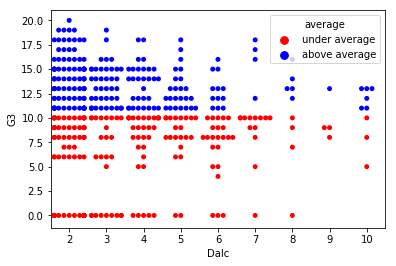

In [9]:
ave = sum(data.G3)/float(len(data))
data['ave_line'] = ave
data['average'] = ['above average' if i > ave else 'under average' for i in data.G3]

sns.swarmplot(x='Dalc', y= 'G3', hue = 'average', data = data, palette={'above average':'blue', 'under average':'red'})
plt.savefig('graph.png')

We noticed that students with the highest grade consumes alcohol twice a week. 

In [10]:
# Final exam average grades
sum(data[data.Dalc == 2].G3)/float(len(data[data.Dalc == 2]))

10.806666666666667

Text(0.5, 0, 'Weekly alcohol consumption')

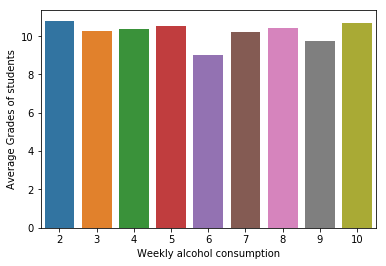

In [11]:
# Average grade
list = []
for i in range(2,11):
    list.append(sum(data[data.Dalc == i].G3)/float(len(data[data.Dalc == i])))
ax = sns.barplot(x = [2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Average Grades of students')
plt.xlabel('Weekly alcohol consumption')